In [1]:
#Statistical Significance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
#import scipy.fftpack

plt.rcParams["figure.figsize"] = (15,7.5)
plt.rcParams.update({'font.size': 20})
plt.rcParams["legend.fontsize"] = (15)

In [4]:
# read in the fft data
fft = pd.read_csv("data/grafana_data_export oct_fftcb.csv", sep = ';', header = 1, engine='python')
fft

,Series,Time,Value
0,CB FFT Band 0,2021-06-21T09:12:20+02:00,0.000160
1,CB FFT Band 0,2021-06-21T09:12:20+02:00,0.000186
2,CB FFT Band 0,2021-06-21T09:12:20+02:00,0.000144
3,CB FFT Band 0,2021-06-21T09:12:20+02:00,0.000226
4,CB FFT Band 0,2021-06-21T09:12:20+02:00,0.000157
...,...,...,...
230663,CB FFT Band 7,2021-06-21T17:13:00+02:00,0.000260
230664,CB FFT Band 7,2021-06-21T17:13:00+02:00,0.000209
230665,CB FFT Band 7,2021-06-21T17:13:00+02:00,0.000328
230666,CB FFT Band 7,2021-06-21T17:13:10+02:00,0.000328


In [5]:
# reduce the time variable
fft.Time.str[11:19]

# replace time variable with reduced string
fft['Time'] = fft.Time.str[11:19]

In [6]:
# separate data into bands
fft_band0 = fft.loc[fft["Series"] == "CB FFT Band 0"]
fft_band1 = fft.loc[fft["Series"] == "CB FFT Band 1"]
fft_band2 = fft.loc[fft["Series"] == "CB FFT Band 2"]
fft_band3 = fft.loc[fft["Series"] == "CB FFT Band 3"]
fft_band4 = fft.loc[fft["Series"] == "CB FFT Band 4"]
fft_band5 = fft.loc[fft["Series"] == "CB FFT Band 5"]
fft_band6 = fft.loc[fft["Series"] == "CB FFT Band 6"]
fft_band7 = fft.loc[fft["Series"] == "CB FFT Band 7"]

# resetting the indecies
fft_band0 = fft_band0.reset_index(drop=True)
fft_band1 = fft_band1.reset_index(drop=True)
fft_band2 = fft_band2.reset_index(drop=True)
fft_band3 = fft_band3.reset_index(drop=True)
fft_band4 = fft_band4.reset_index(drop=True)
fft_band5 = fft_band5.reset_index(drop=True)
fft_band6 = fft_band6.reset_index(drop=True)
fft_band7 = fft_band7.reset_index(drop=True)

In [8]:
print("Indexes for B1:",
fft_band3.index[fft_band3['Time'] == '09:25:50'],
fft_band3.index[fft_band3['Time'] == '09:30:50'])
print("Indexes for B2:", 
fft_band3.index[fft_band3['Time'] == '09:37:00'],
fft_band3.index[fft_band3['Time'] == '09:41:40'])
print("Indexes for B3:",
fft_band3.index[fft_band3['Time'] == '09:56:00'],
fft_band3.index[fft_band3['Time'] == '10:00:40'])
print("Indexes for A1:",
fft_band3.index[fft_band3['Time'] == '16:00:00'],
fft_band3.index[fft_band3['Time'] == '16:02:00'])
print("Indexes for A2:",
fft_band3.index[fft_band3['Time'] == '16:10:00'],
fft_band3.index[fft_band3['Time'] == '16:14:00'])
print("Indexes for A3:",
fft_band3.index[fft_band3['Time'] == '16:19:00'],
fft_band3.index[fft_band3['Time'] == '16:22:10'])
print("Indexes for A4:",
fft_band3.index[fft_band3['Time'] == '16:24:20'],
fft_band3.index[fft_band3['Time'] == '16:28:00'])
print("Indexes for A5:",
fft_band3.index[fft_band3['Time'] == '16:31:30'],
fft_band3.index[fft_band3['Time'] == '16:36:50'])
print("Indexes for A6:",
fft_band3.index[fft_band3['Time'] == '16:45:20'],
fft_band3.index[fft_band3['Time'] == '16:50:50'])
print("Indexes for A7:",
fft_band3.index[fft_band3['Time'] == '16:57:10'],
fft_band3.index[fft_band3['Time'] == '17:00:00'])
print("Indexes for A8:",
fft_band3.index[fft_band3['Time'] == '17:00:00'],
fft_band3.index[fft_band3['Time'] == '17:05:30'])

Indexes for B1: Int64Index([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
            1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000],
           dtype='int64') Int64Index([2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2791,
            2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800, 2801, 2802,
            2803, 2804, 2805, 2806, 2807],
           dtype='int64')
Indexes for B2: Int64Index([3722, 3723, 3724, 3725, 3726, 3727, 3728, 3729, 3730, 3731, 3732,
            3733, 3734, 3735, 3736, 3737, 3738, 3739, 3740, 3741, 3742, 3743,
            3744, 3745, 3746, 3747, 3748],
           dtype='int64') Int64Index([4504, 4505, 4506, 4507, 4508, 4509, 4510, 4511, 4512, 4513, 4514,
            4515, 4516, 4517, 4518, 4519, 4520, 4521, 4522, 4523, 4524, 4525,
            4526, 4527, 4528, 4529],
           dtype='int64')
Indexes for B3: Int64Index([6684, 6685, 6686

In [13]:
# Cutting off the edges of the data so I get consistent vibration data

#B1 Ads
b1_fft_band3 = fft_band3.iloc[1969:2720]
#B2
b2_fft_band3 = fft_band3.iloc[3693:4400]
#B3
b3_fft_band3 = fft_band3.iloc[6643:7403]


#A1 Ads
a1_fft_band3 = fft_band3.iloc[23325:23450]
#A2
a2_fft_band3 = fft_band3.iloc[24100:24595]
#A3
a3_fft_band3 = fft_band3.iloc[24850:25300]
#A4
a4_fft_band3 = fft_band3.iloc[25700:26260]
#A5
a5_fft_band3 = fft_band3.iloc[26570:26670]

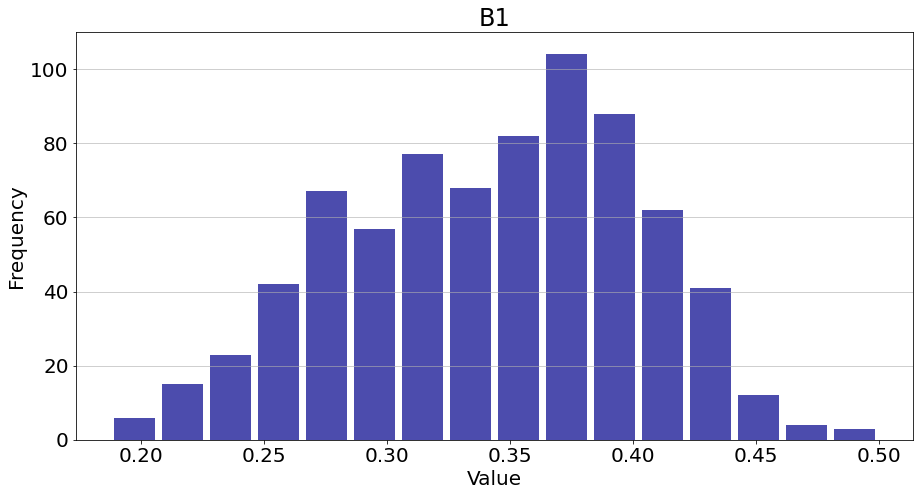

0.34196556324900135 0.05934780452151251 751


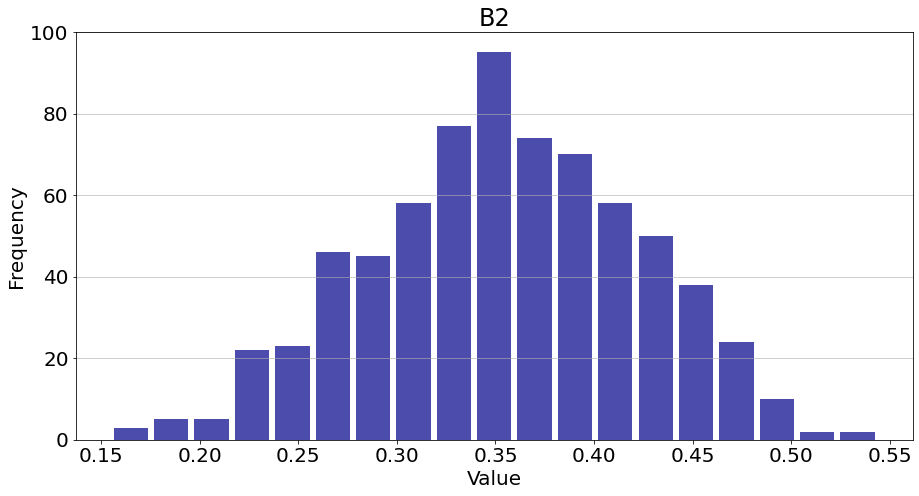

0.35422497171145684 0.06806543899654507 707


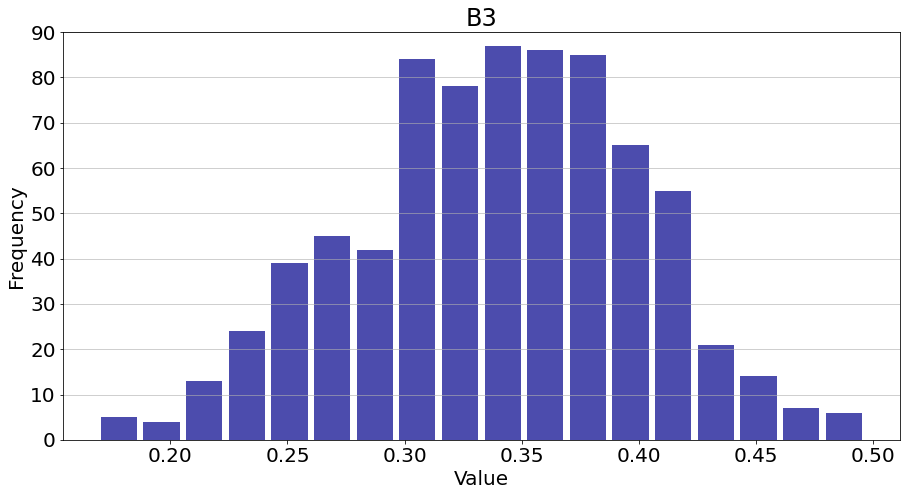

0.3395069118421053 0.05952922521109547 760


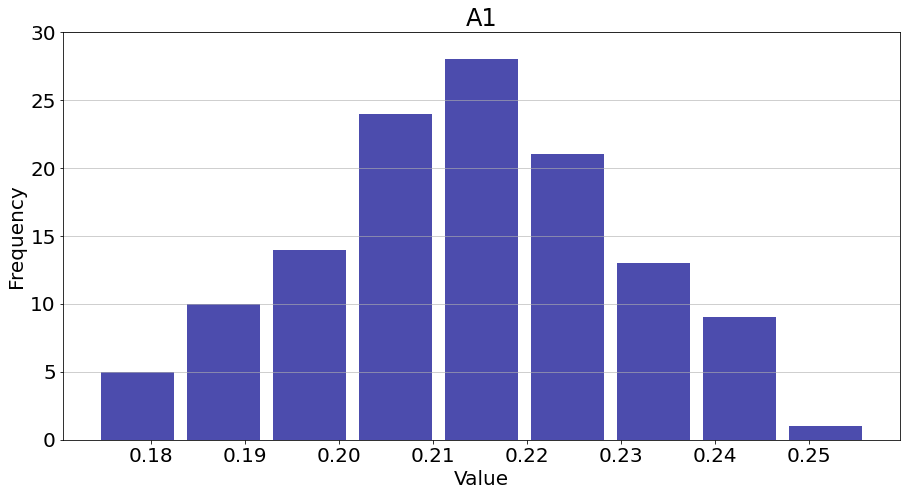

0.21338152800000004 0.016725897458237746 125


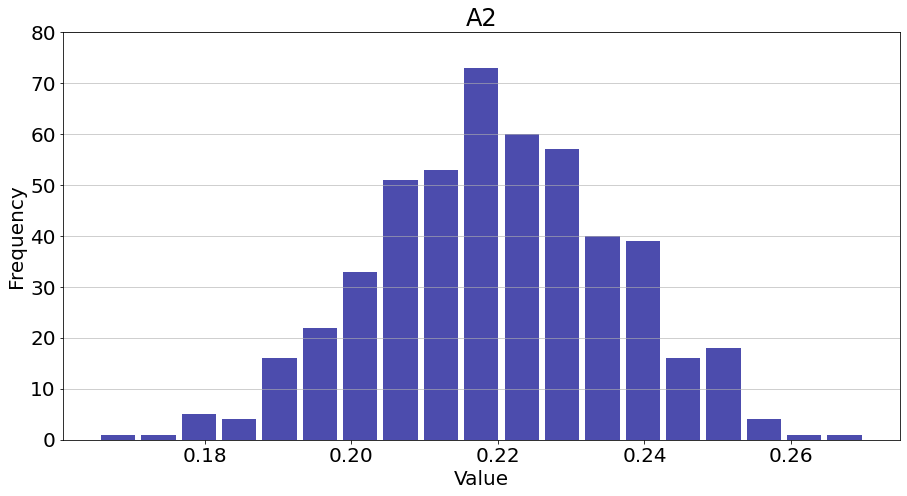

0.21980733737373737 0.016597080137128226 495


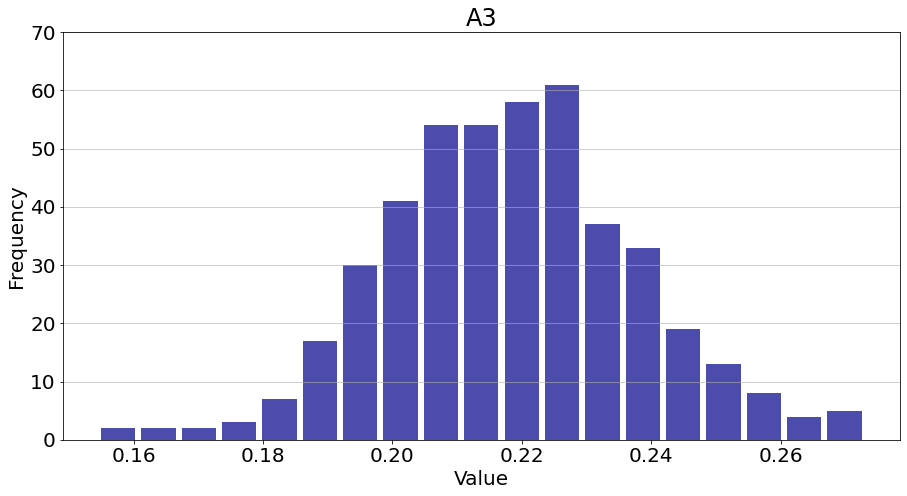

0.21839128444444444 0.01946327107820464 450


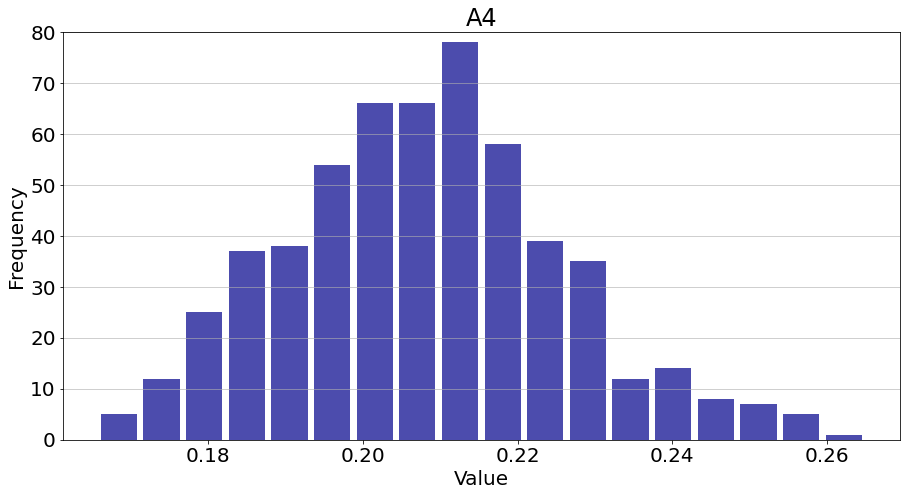

0.20806477499999998 0.017888859205788556 560


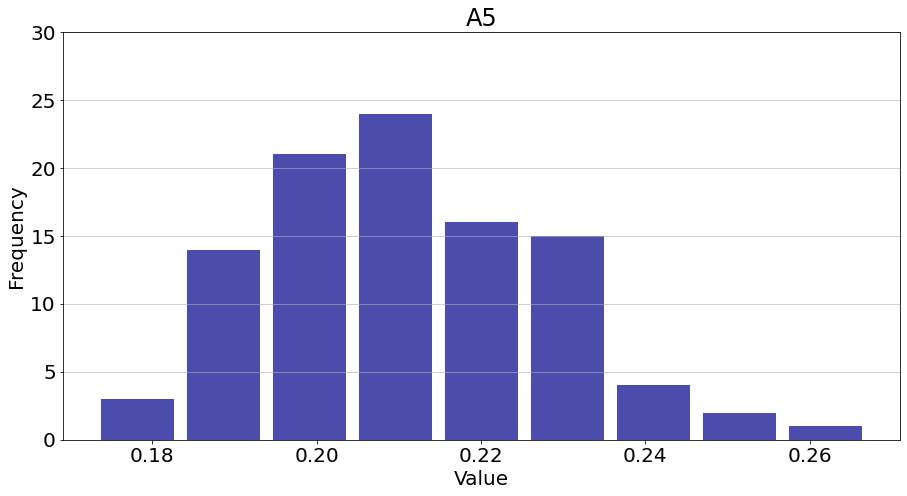

0.21108556 0.017612023336529642 100


In [29]:
# Creation graphs of all of the conditions of band 3

def bar_graphs(data, name):

    n, bins, patches = plt.hist(x= data['Value'], bins='auto', color='darkblue', alpha=0.7, rwidth=0.85)

    plt.grid(axis='y', alpha=0.75)

    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(name)

    maxfreq = n.max()

    # Set a clean upper y-axis limit.
    plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    plt.show()

    print(
    data['Value'].mean(),
    data['Value'].std(),
    data['Value'].count())

bar_graphs(b1_fft_band3, 'B1')
bar_graphs(b2_fft_band3, 'B2')
bar_graphs(b3_fft_band3, 'B3')
bar_graphs(a1_fft_band3, 'A1')
bar_graphs(a2_fft_band3, 'A2')
bar_graphs(a3_fft_band3, 'A3')
bar_graphs(a4_fft_band3, 'A4')
bar_graphs(a5_fft_band3, 'A5')



In [ ]:
(.25 - .3415)/(0.05943550548331934 / np.sqrt(170))

In [30]:
#A1 and A4 both target condition for old equipment. Statistically Significant Difference

(0.208064774999999983 - 0.21338152800000004)/(0.017888859205788556 / np.sqrt(560))


-7.033279109236093